# Project Title : Retail Sales Forecasting Using Machine Learning and Time-Series Models




**Project description:**

Developed an end-to-end retail sales forecasting system by integrating Machine Learning models (Random Forest, XGBoost) with Time-Series techniques (ARIMA, Prophet). The project involved extensive data preprocessing, feature engineering (date-based features, promotions, holidays, store-level attributes), and model optimization using cross-validation and hyperparameter tuning.
Daily and store-level sales were predicted and evaluated using RMSE, MAE, and R² metrics, where Random Forest achieved 0.99 R² and Prophet achieved 0.81 R² in forecasting performance.
A hybrid ensemble model was built to enhance accuracy and prediction stability. The final solution was deployed through a user-friendly Streamlit/Flask interface, enabling real-time sales prediction and supporting data-driven decision-making for retail businesses.

# Importing Necessary Libraries

In [1]:
# Libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**LOADING THE DATA**

In [2]:
store='C:/Users/palan/Downloads/store.csv'
store=pd.read_csv(store)

In [3]:
rsd='C:/Users/palan/Downloads/Rossmann Stores Data.csv'
ross_data=pd.read_csv(rsd)

In [4]:
ross_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
#columns

ross_data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [6]:
store.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [7]:
# Concize summary of ross_data
ross_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [8]:
# Descriptive Stats of ross_data dataset
ross_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [9]:
# Top five rows of the dataset
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [10]:
# No. of rows and columns
print('No of rows in the dataset (store) are', store.shape[0])
print('No of columns in the dataset (store) are', store.shape[1])

No of rows in the dataset (store) are 1115
No of columns in the dataset (store) are 10


In [11]:
# Descriptive Stats of store dataset
store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [12]:
# Concise summary of store
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


# Handling Missing Values

In [13]:
# Sum of null values
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [14]:
# Null value (percentage) of total dataset(store).
(store.isnull().sum()/store.shape[0])*100

Store                         0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.269058
CompetitionOpenSinceMonth    31.748879
CompetitionOpenSinceYear     31.748879
Promo2                        0.000000
Promo2SinceWeek              48.789238
Promo2SinceYear              48.789238
PromoInterval                48.789238
dtype: float64

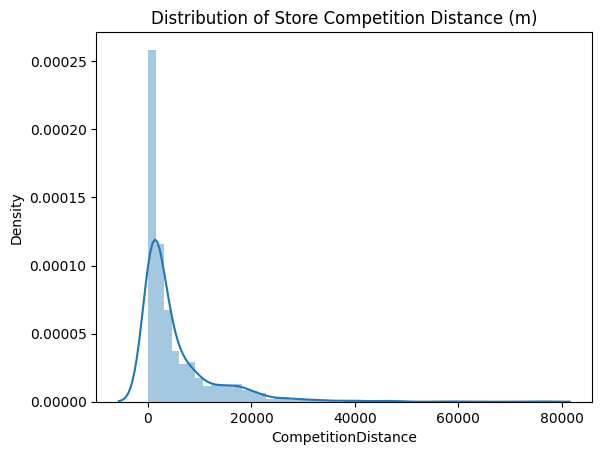

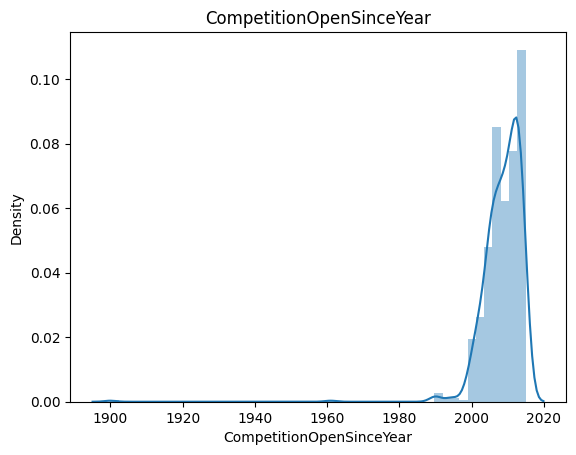

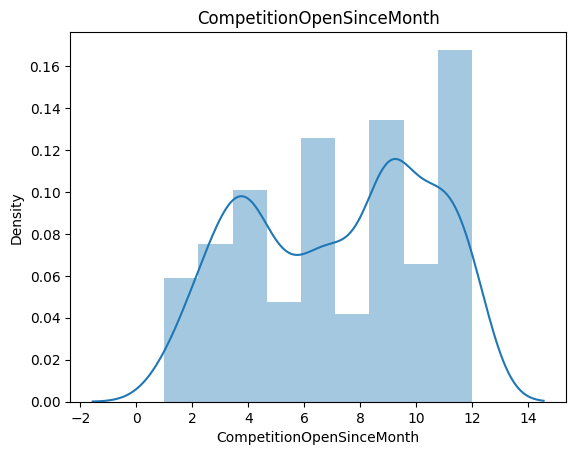

In [15]:
# Distribution of CompetitionDistance
sns.distplot(store.CompetitionDistance)
plt.title('Distribution of Store Competition Distance (m)')
plt.show()

# # Distribution of CompetitionOpenSinceYear

plt.title('CompetitionOpenSinceYear')
sns.distplot(store.CompetitionOpenSinceYear)
plt.show()

# Distribution of CompetitionOpenSinceMonth

plt.title('CompetitionOpenSinceMonth')
sns.distplot(store.CompetitionOpenSinceMonth)
plt.show()

Dristribution of CompetitionDistance is right skewed so we'll replace the missing values with the median.

In [16]:
# Replacing missing values with median value
store['CompetitionDistance'].fillna(store['CompetitionDistance'].median() ,inplace = True)

Since the columns 'CompetitionOpenSinceMonth' and 'CompetitionOpenSinceYear' both are categorical columns(Months and Years) so we will replace the missing values with mode of particular column and we can see in the code cell below that both columns have only 1 mode.

In [17]:
# Checking for modes
print(store['CompetitionOpenSinceMonth'].mode())
print(store['CompetitionOpenSinceYear'].mode())

0    9.0
Name: CompetitionOpenSinceMonth, dtype: float64
0    2013.0
Name: CompetitionOpenSinceYear, dtype: float64


In [18]:
# Replacing null values with mode
store['CompetitionOpenSinceMonth'].fillna(store['CompetitionOpenSinceMonth'].mode()[0], inplace = True)
store['CompetitionOpenSinceYear'].fillna(store['CompetitionOpenSinceYear'].mode()[0], inplace = True)

In [19]:
# Head
store.head(10).T

,0,1,2,3,4,5,6,7,8,9
Store,1,2,3,4,5,6,7,8,9,10
StoreType,c,a,a,c,a,a,a,a,a,a
Assortment,a,a,a,c,a,a,c,a,c,a
CompetitionDistance,1270.0,570.0,14130.0,620.0,29910.0,310.0,24000.0,7520.0,2030.0,3160.0
CompetitionOpenSinceMonth,9.0,11.0,12.0,9.0,4.0,12.0,4.0,10.0,8.0,9.0
CompetitionOpenSinceYear,2008.0,2007.0,2006.0,2009.0,2015.0,2013.0,2013.0,2014.0,2000.0,2009.0
Promo2,0,1,1,0,0,0,0,0,0,0
Promo2SinceWeek,NaN,13.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Promo2SinceYear,NaN,2010.0,2011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PromoInterval,NaN,"Jan,Apr,Jul,Oct","Jan,Apr,Jul,Oct",NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can observe that 'Promo2SinceWeek', 'Promo2SinceYear' and 'PromoInterval' are NaN where Promo2 is zero and they have nearly 50% missing value so we will drop these columns.

In [20]:
store.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [21]:
#dropping columns from store dataset
store.drop('Promo2SinceWeek',axis=1,inplace=True)
store.drop('Promo2SinceYear',axis=1,inplace=True)
store.drop('PromoInterval',axis=1,inplace=True)

In [22]:
store.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2'],
      dtype='object')

In [23]:
# Null values sum (store)
store.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
dtype: int64

In [24]:
# Null values sum (ross_data)
ross_data.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

**Value counts in following columns**

In [25]:
# Values Counts
print('DayOfWeek:\n', ross_data['DayOfWeek'].value_counts(), '\n\n' )
print('Open:\n', ross_data['Open'].value_counts(), '\n\n' )

DayOfWeek:
 DayOfWeek
5    145845
4    145845
3    145665
2    145664
1    144730
7    144730
6    144730
Name: count, dtype: int64 


Open:
 Open
1    844392
0    172817
Name: count, dtype: int64 




In [26]:
# Value count cont.
print('Promo:\n', ross_data['Promo'].value_counts(), '\n\n' )
print('StateHoliday:\n', ross_data['StateHoliday'].value_counts(), '\n\n')
print('SchoolHoliday:\n', ross_data['SchoolHoliday'].value_counts())

Promo:
 Promo
0    629129
1    388080
Name: count, dtype: int64 


StateHoliday:
 StateHoliday
0    855087
0    131072
a     20260
b      6690
c      4100
Name: count, dtype: int64 


SchoolHoliday:
 SchoolHoliday
0    835488
1    181721
Name: count, dtype: int64


Checking unique value in StateHoliday because it has two zeros.

In [27]:
#Checking unique value
ross_data['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In 'StateHoliday' 0 is repeated so, we will fix this using lambda function.

# Feature Engineering

In [28]:
# Dropping '0' in 'Open' as it indicates that store was closed
openstore_df = ross_data[ross_data['Open'] != 0]

In [29]:
# we can now drop the column 'Open' as we only included data with 'Open' = 1
openstore_df.drop('Open', axis = 1, inplace = True)
# Making a Copy
ross_df = openstore_df.copy()

In [30]:
# head
ross_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1


We can see that the spike that was present there is now gone.

In [31]:
# Checking for infinite values
np.isinf(ross_df['Sales']).sum()

0

In [32]:
# Checking for null
ross_df.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [33]:
# info
ross_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 844392 entries, 0 to 1017190
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Store          844392 non-null  int64 
 1   DayOfWeek      844392 non-null  int64 
 2   Date           844392 non-null  object
 3   Sales          844392 non-null  int64 
 4   Customers      844392 non-null  int64 
 5   Promo          844392 non-null  int64 
 6   StateHoliday   844392 non-null  object
 7   SchoolHoliday  844392 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 58.0+ MB


In [34]:
# Creating a list of all relevant numerical features for linear regg.
num_features = list(ross_df.describe().columns)

#num_features.remove('Store')
num_features.remove('Sales')

num_features

['Store', 'DayOfWeek', 'Customers', 'Promo', 'SchoolHoliday']

Merging both datasets

In [35]:
# Merging using left join
joined_data = pd.merge(ross_df, store, how= 'left')


**Label encoding**

Assigning each of the following categorical columns an integer value based on alphabetical order.

In [36]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

joined_data['StoreType'] = label_encoder.fit_transform(joined_data['StoreType'])
joined_data['Assortment'] = label_encoder.fit_transform(joined_data['Assortment'])
# joined_data['StateHoliday'] = label_encoder.fit_transform(joined_data['StateHoliday'])

# Head
joined_data.head().T

,0,1,2,3,4
Store,1,2,3,4,5
DayOfWeek,5,5,5,5,5
Date,2015-07-31,2015-07-31,2015-07-31,2015-07-31,2015-07-31
Sales,5263,6064,8314,13995,4822
Customers,555,625,821,1498,559
Promo,1,1,1,1,1
StateHoliday,0,0,0,0,0
SchoolHoliday,1,1,1,1,1
StoreType,2,0,0,2,0
Assortment,0,0,0,2,0


**Checking for multicolinearity**

In [37]:
joined_data['Date'].head()

0    2015-07-31
1    2015-07-31
2    2015-07-31
3    2015-07-31
4    2015-07-31
Name: Date, dtype: object

<Axes: >

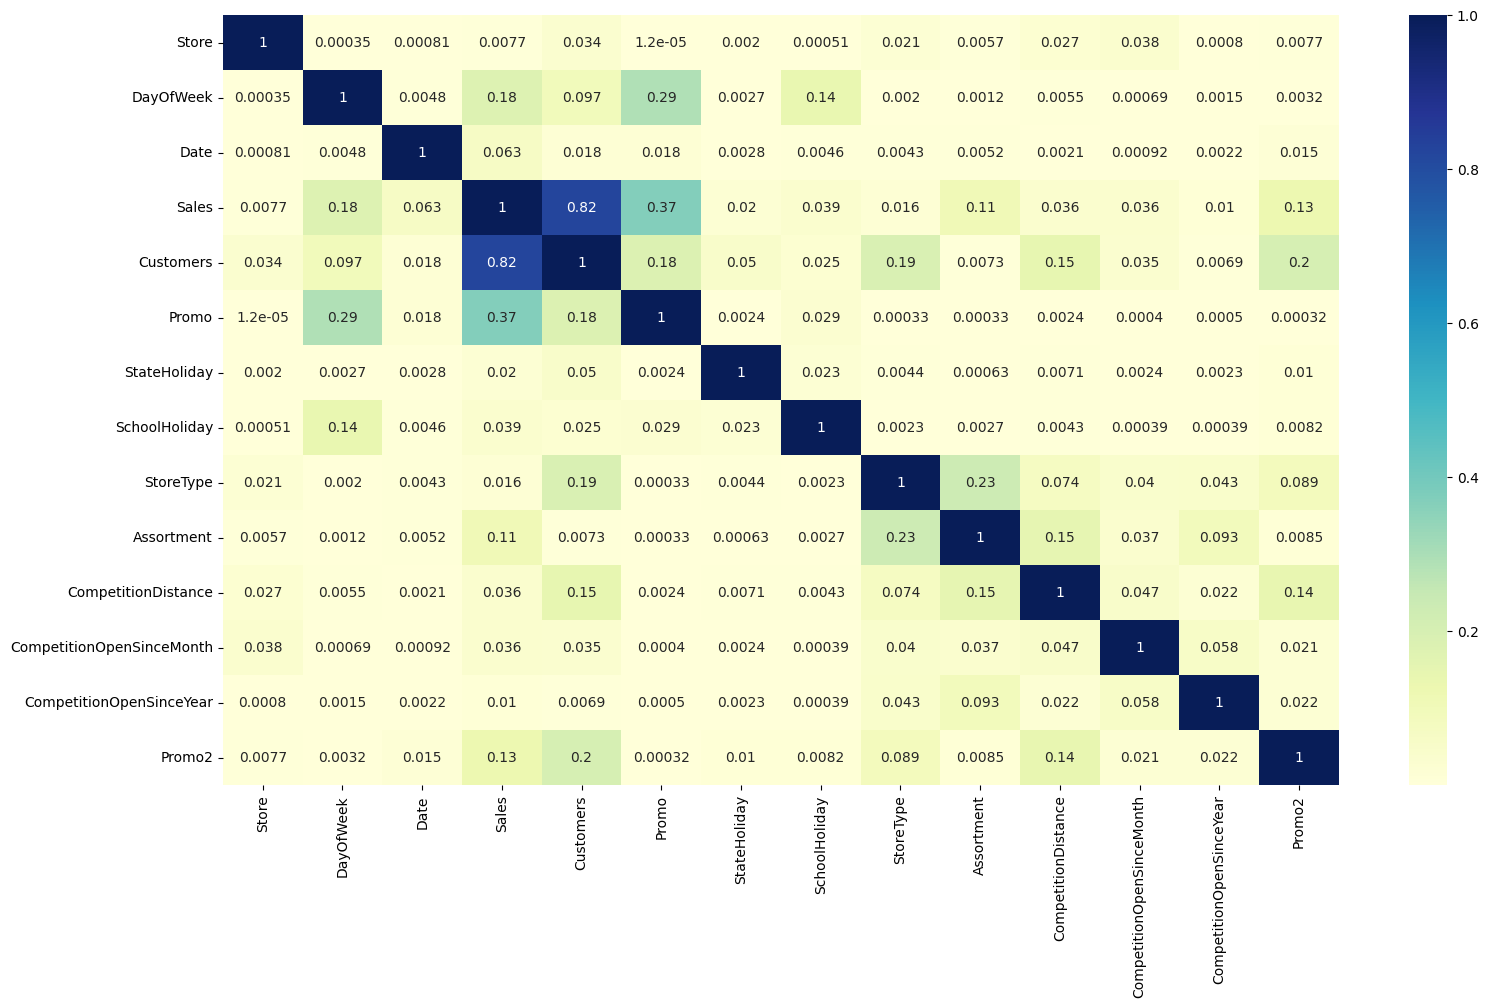

In [38]:
# correlation heat map
plt.figure(figsize = (18,10))
joined_data['Date'] = pd.to_datetime(joined_data['Date'])


joined_data['StateHoliday'] = joined_data['StateHoliday'].apply(lambda x: '0' if x == 0 else x)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
joined_data['StateHoliday'] = label_encoder.fit_transform(joined_data['StateHoliday'])

correlation=joined_data.corr()
sns.heatmap(abs(correlation), annot = True, cmap = 'YlGnBu')

In [39]:
# Dropping store and date columns because they are irrelevant
joined_data.drop(['Store', 'Date'], axis = 1, inplace = True)

**Variance Inflation Factor**

In [40]:
# importing vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

# defining a fuction for vif
def calculate_vif(X):
    """
    this function calculates the variance inflation factor
    """
    # VIF calculation
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [41]:
# defining a DataFrame containing on low VIF variables (as we observed above)
joined_data_vif = joined_data[[i for i in joined_data.describe().columns if i not in ['Sales','Year','CompetitionOpenSinceYear','Month','WeekOfYear']]].head()
joined_data_vif.head()

,DayOfWeek,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,Promo2
0,5,555,1,0,1,2,0,1270.0,9.0,0
1,5,625,1,0,1,0,0,570.0,11.0,1
2,5,821,1,0,1,0,0,14130.0,12.0,1
3,5,1498,1,0,1,2,2,620.0,9.0,0
4,5,559,1,0,1,0,0,29910.0,4.0,0


# ML Model Building

In [42]:
# importing ML models
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [43]:
# Evaluation Metrics
import math
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

We will make a copy of merged dataframe to use it for linear regression and elastic net regression. We will use the log of 'Sales' and 'Customers' columns because it will remove the hetroscadasticity of the linear relationship betwwen then (we observed above in target columns vs numerical freatures).

In [44]:
# Copy of merged DF
joined_df_lr = joined_data.copy()

In [45]:
# log10 transformation of 'Sales'
joined_df_lr['Sales'] = np.log10(joined_df_lr['Sales'])

In [46]:
# Cheching for inf values
np.isinf(joined_df_lr['Sales']).sum()

54

In [47]:
# droping infinite values after transformation
joined_df_lr.drop(joined_df_lr[joined_df_lr['Sales'] == float("-inf")].index,inplace=True)

In [48]:
# log10 transformation of 'Customers'
joined_df_lr['Customers'] = np.log10(joined_df_lr['Customers'])

In [49]:
# Cheching for inf values again
np.isinf(joined_df_lr['Customers']).sum()

0

In [50]:
# Declaring Independent and dependent variable for linear regression and elastic net
dependent_var = 'Sales'
independent_var = joined_data_vif.columns
# Creating the datafrmae of independent variables
X_lr = joined_df_lr[independent_var].values

# Creating the dataframe of dependent variable
y_lr = joined_df_lr[dependent_var].values
# Splitting the Dataset into Test and Train
X_lr = pd.DataFrame(X_lr)
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size=0.2, random_state = 0)

# Shape of train data
print(X_train_lr.shape)
# Shape of test data
print(X_test_lr.shape)

(675470, 10)
(168868, 10)


In [51]:
# Using StandardScaler to normalize the independent variables.
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train_lr)
scaled_X_test = scaler.transform(X_test_lr)

**Linear Regression**

In [52]:
# Fitting Multiple Linear Regression to the Training set
# Formation of equation
regressor = LinearRegression()
regressor.fit(scaled_X_train, y_train_lr)

LinearRegression()

In [53]:
# Intercept of equation
regressor.intercept_

3.803451468689651

In [54]:
# Model coefficients
regressor.coef_

array([-0.00312988,  0.16008638,  0.03447721, -0.00293643,  0.00135151,
        0.03184755,  0.01032746,  0.01547871, -0.00176941,  0.01308583])

In [55]:
# predicted sales from training dataset
y_pred_train = regressor.predict(scaled_X_train)

# predicted sales from testing dataset
y_pred_test = regressor.predict(scaled_X_test)

In [56]:
# Defining RMSE function
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(x, y):
    return sqrt(mean_squared_error(x, y))

# Defining MAPE function
def mape(x, y):
    return np.mean(np.abs((x - y) / x)) * 100
# Evaluation Metrics for Linear Regression

print("Regresion Model Training Score" , ":" , regressor.score(scaled_X_train, y_train_lr),
      "Model Test Score" ,":" , regressor.score(scaled_X_test, y_test_lr))

print("Training RMSE", ":", rmse(y_train_lr, y_pred_train),
      "Testing RMSE", ":", rmse(y_test_lr, y_pred_test))

print("Training MAPE", ":", mape(y_train_lr, y_pred_train),
      "Testing MAPE", ":", mape(y_test_lr, y_pred_test))

r2 = r2_score(y_test_lr, y_pred_test)
print("R2 :" ,r2)

Regresion Model Training Score : 0.8192546500150173 Model Test Score : 0.8190895526978824
Training RMSE : 0.0784888883277613 Testing RMSE : 0.07868961970753413
Training MAPE : 1.6074996316883348 Testing MAPE : 1.6096148108414956
R2 : 0.8190895526978824


In [57]:
# Performance of the model
r2s_lr = r2_score(y_train_lr,y_pred_train)
r2s2_lr = r2_score(y_test_lr,y_pred_test)

mae_lr = mae(y_train_lr,y_pred_train)
mae2_lr = mae(y_test_lr,y_pred_test)

rmse_lr = math.sqrt(mse(y_train_lr,y_pred_train))
rmse2_lr = math.sqrt(mse(y_test_lr,y_pred_test))

mse_lr = mse(y_train_lr,y_pred_train)
mse2_lr = mse(y_test_lr,y_pred_test)

print('Performance of Linear Regression Model:')
print('-'*40)

print('r2_score train:',r2s_lr)
print('r2_score test:',r2s2_lr)

print('\nMean absolute error train: %.2f' % mae_lr)
print('Mean absolute error test: %.2f' % mae2_lr)

print('\nRoot mean squared error train: ', rmse_lr)
print('Root mean squared error test: ', rmse2_lr)

print('\nMean Sq error train: %.2f' % mse_lr)
print('Mean Sq error test: %.2f' % mse2_lr)

Performance of Linear Regression Model:
----------------------------------------
r2_score train: 0.8192546500150173
r2_score test: 0.8190895526978824

Mean absolute error train: 0.06
Mean absolute error test: 0.06

Root mean squared error train:  0.0784888883277613
Root mean squared error test:  0.07868961970753413

Mean Sq error train: 0.01
Mean Sq error test: 0.01


Text(0, 0.5, 'Predicted values')

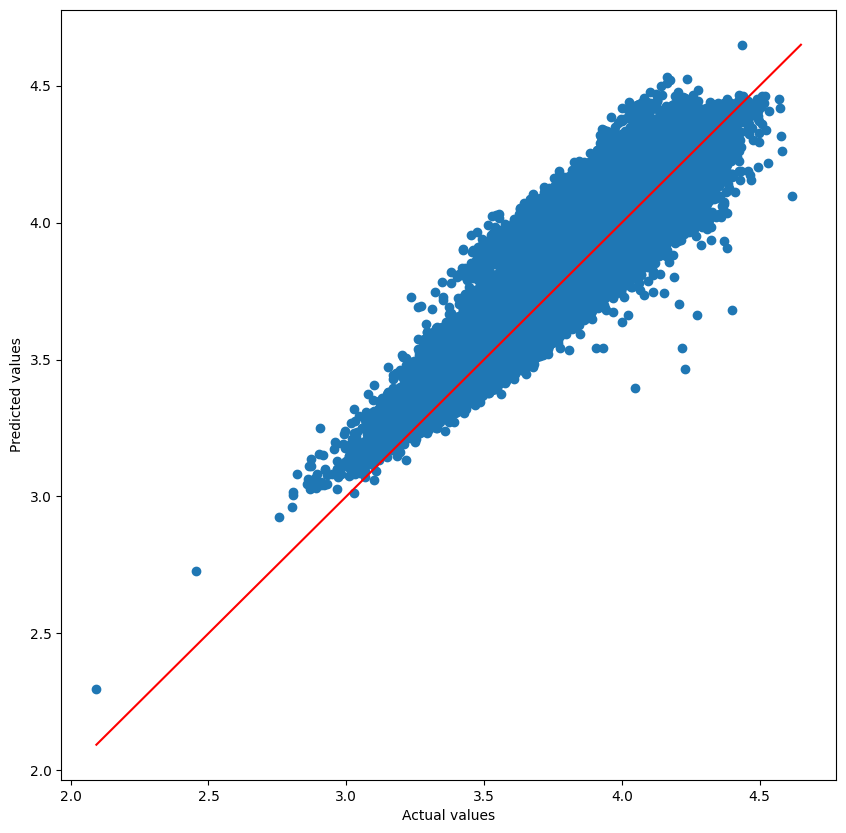

In [58]:
# Showing the optimally fitted line
plt.figure(figsize=(10,10))
plt.scatter(y_test_lr,y_pred_test)

p1 = max(max(y_pred_test),max(y_test_lr))
p2 = min(min(y_pred_test),min(y_test_lr))
plt.plot([p1,p2],[p1,p2],c='r')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

**Elastic Net Regression**

In [59]:
# ElasticNet
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)
# Model fitting
elasticnet.fit(scaled_X_train,y_train_lr)

ElasticNet(alpha=0.1)

In [60]:
# Elasticnet score
elasticnet.score(scaled_X_train, y_train_lr)

0.6394617895674009

In [61]:
# Predicting test set
y_pred_en = elasticnet.predict(scaled_X_test)
MSE  = mse(y_test_lr, y_pred_en)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test_lr,y_pred_en)
print("R2 :" ,r2)

MSE : 0.012318562564570474
RMSE : 0.11098902001806518
R2 : 0.6400942475647481


**Xgboost Model**

In [62]:
# decalring independent and dependent variables
target_col = 'Sales'
input_cols = joined_data.columns.drop(target_col)
input_cols

Index(['DayOfWeek', 'Customers', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2'],
      dtype='object')

We will use these independent and dependent variables for Xgboost, Decision Tree and Random forest because previous independent and dependent variables contain log10 transformation of 'Sales' and 'Customers' columns also, the following three models can handle multicolinearity.

In [63]:
# train test split
X_train, X_test, y_train, y_test  = train_test_split(joined_data[input_cols], joined_data[target_col], test_size = 0.2, random_state = 1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((675513, 11), (168879, 11), (675513,), (168879,))

In [64]:
# standard scaler to nornamlise the data
scaler = StandardScaler()
scale_X_train = scaler.fit_transform(X_train)
scale_X_test = scaler.transform(X_test)
scale_X_train[0:10]

array([[-0.8815276 , -0.46869897, -0.89902131, -0.02942757, -0.49058676,
        -0.88400422,  1.0708068 , -0.39986315,  0.43604524,  0.55287989,
        -0.99743782],
       [ 0.8590309 ,  0.34962299,  1.11232069, -0.02942757, -0.49058676,
         1.31661763,  1.0708068 , -0.34207839, -0.64433529,  0.92993265,
        -0.99743782],
       [-1.46171377,  1.72929385,  1.11232069, -0.02942757,  2.03837543,
         1.31661763,  1.0708068 , -0.64512738, -0.64433529,  0.74140627,
        -0.99743782],
       [ 1.43921706, -0.71070272, -0.89902131, -0.02942757, -0.49058676,
        -0.88400422, -0.943055  , -0.66567307,  0.79617208, -0.76680479,
         1.00256876],
       [-0.8815276 ,  1.17043983,  1.11232069, -0.02942757, -0.49058676,
        -0.88400422,  1.0708068 ,  2.0450745 ,  1.15629893, -0.01269926,
        -0.99743782],
       [ 0.8590309 , -1.06747113,  1.11232069, -0.02942757, -0.49058676,
         1.31661763,  1.0708068 , -0.41784063,  1.51642577, -0.57827841,
         1.002

In [65]:
# Building XGBoost Regressor Model:
xgb = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)
xgb.fit(scale_X_train,y_train)

y_predict_xgb = xgb.predict(scale_X_test)

In [66]:
#Performance of the model
r2s_xgb = r2_score(y_test,y_predict_xgb)
mae_xgb = mae(y_test,y_predict_xgb)
rmse_xgb = math.sqrt(mse(y_test,y_predict_xgb))
print('Performance of XGBoost Regressor Model:')
print('-'*40)
print('r2_score:',r2s_xgb)
print('Mean absolute error: %.2f' % mae_xgb)
print('Root mean squared error: ', rmse_xgb)

Performance of XGBoost Regressor Model:
----------------------------------------
r2_score: 0.8812553286552429
Mean absolute error: 787.49
Root mean squared error:  1072.2136161161752


**DecisionTree Model**

In [67]:
# Building Decision Tree Regressor Model:

model = DecisionTreeRegressor()
model.fit(scale_X_train,y_train)

y_predict_dt = model.predict(scale_X_test)
# Performance of the model
r2s_3 = r2_score(y_test,y_predict_dt)
mae3 = mae(y_test,y_predict_dt)
rmse3 = math.sqrt(mse(y_test,y_predict_dt))
print('Performance of Decesion Tree Model:')
print('-'*40)
print('r2_score:',r2s_3)
print('Mean absolute error: %.2f' % mae3)
print('Root mean squared error: ', rmse3)

Performance of Decesion Tree Model:
----------------------------------------
r2_score: 0.9480153163554269
Mean absolute error: 472.71
Root mean squared error:  709.4339596765914


**Random Forest Regression Model**

In [68]:
# Building Random Forest Regressor Model:

random_forest_model = RandomForestRegressor(n_estimators=50)
random_forest_model.fit(scale_X_train,y_train)

y_predict_rf = random_forest_model.predict(scale_X_test)
# Performance of the model
r2s_4 = r2_score(y_test,y_predict_rf)
mae4 = mae(y_test,y_predict_rf)
rmse4 = math.sqrt(mse(y_test,y_predict_rf))
print('Performance of Random Forest Regression Model:')
print('-'*40)
print('r2_score:', r2s_4)
print('Mean absolute error: %.2f' % mae4)
print('Root mean squared error: ', rmse4)

Performance of Random Forest Regression Model:
----------------------------------------
r2_score: 0.9676691591764577
Mean absolute error: 377.43
Root mean squared error:  559.4776869939493


In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Reduce the parameter grid to meaningful values
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 20],
    'max_features': ['sqrt', 'log2'],
    'n_estimators': [50, 100]
}

rfr = RandomForestRegressor(random_state=1)

g_search = GridSearchCV(
    estimator=rfr,
    param_grid=param_grid,
    cv=2,     
    n_jobs=-1,
    verbose=1
)

g_search.fit(scale_X_train, y_train)

print("Best Params:", g_search.best_params_)

Fitting 2 folds for each of 8 candidates, totalling 16 fits
Best Params: {'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 100}


In [70]:
# Model prediction train set
y_pred_RandomForest_tuned_train = g_search.predict(scale_X_train)
# Model prediction test set
y_pred_RandomForest_tuned_test = g_search.predict(scale_X_test)
print("Regresion Model Training Score" , ":" , g_search.score(scale_X_train, y_train),
      "Model Test Score" ,":" , g_search.score(scale_X_test, y_test))

print("Training RMSE", ":", rmse(y_train, y_pred_RandomForest_tuned_train),
      "Testing RMSE", ":", rmse(y_test, y_pred_RandomForest_tuned_test))

print("Training MAPE", ":", mape(y_train, y_pred_RandomForest_tuned_train),
      "Testing MAPE", ":", mape(y_test, y_pred_RandomForest_tuned_test))

r2 = r2_score(y_test, y_pred_RandomForest_tuned_test)
print("R2 :" ,r2)

Regresion Model Training Score : 0.9815565269845845 Model Test Score : 0.9637562268446982
Training RMSE : 421.3241046460883 Testing RMSE : 592.3671586072734
Training MAPE : inf Testing MAPE : inf
R2 : 0.9637562268446982


In [81]:
!pip install pmdarima prophet

In [82]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import pmdarima as pm
from prophet import Prophet

def rmse(y, yhat): return np.sqrt(mean_squared_error(y, yhat))
def mae(y, yhat): return mean_absolute_error(y, yhat)

In [83]:
df_arima = ross_df.copy()
df_arima["Date"] = pd.to_datetime(df_arima["Date"])

# Daily aggregation
daily_sales = df_arima.groupby("Date")["Sales"].sum().reset_index()
daily_sales = daily_sales.set_index("Date")

# Train-test split (last 30 days for testing)
train_arima = daily_sales.iloc[:-30]["Sales"]
test_arima = daily_sales.iloc[-30:]["Sales"]

# Build ARIMA
arima_model = pm.auto_arima(
    train_arima,
    seasonal=True,
    m=7,
    trace=False,
    suppress_warnings=True,
    stepwise=True
)

arima_pred = arima_model.predict(n_periods=len(test_arima))


In [84]:
df_prophet = ross_df.copy()
df_prophet["ds"] = pd.to_datetime(df_prophet["Date"])
df_prophet["y"] = df_prophet["Sales"]

# Daily aggregating for Prophet too
prophet_df = df_prophet.groupby("ds")["y"].sum().reset_index()

# Split
prophet_train = prophet_df.iloc[:-30]

model_prophet = Prophet()
model_prophet.fit(prophet_train)

future = model_prophet.make_future_dataframe(periods=30)
forecast = model_prophet.predict(future)

prophet_pred = forecast.iloc[-30:]["yhat"].values


21:43:10 - cmdstanpy - INFO - Chain [1] start processing
21:43:10 - cmdstanpy - INFO - Chain [1] done processing


In [85]:
ml_comparison = pd.DataFrame({
    "Actual": y_test.values,
    "RandomForest": y_predict_rf,
    "XGBoost": y_predict_xgb
})

ml_results = pd.DataFrame({
    "Model": ["RandomForest", "XGBoost"],
    "RMSE": [
        rmse(ml_comparison["Actual"], ml_comparison["RandomForest"]),
        rmse(ml_comparison["Actual"], ml_comparison["XGBoost"])
    ],
    "MAE": [
        mae(ml_comparison["Actual"], ml_comparison["RandomForest"]),
        mae(ml_comparison["Actual"], ml_comparison["XGBoost"])
    ],
    "R2": [
        r2_score(ml_comparison["Actual"], ml_comparison["RandomForest"]),
        r2_score(ml_comparison["Actual"], ml_comparison["XGBoost"])
    ]
})

print("=== ML MODEL RESULTS ===")
print(ml_results)

=== ML MODEL RESULTS ===
          Model         RMSE         MAE        R2
0  RandomForest   559.477687  377.425755  0.967669
1       XGBoost  1072.213616  787.485802  0.881255


In [86]:
ml_comparison["Hybrid"] = 0.5 * ml_comparison["RandomForest"] + \
                          0.5 * ml_comparison["XGBoost"]

hybrid_rmse = rmse(ml_comparison["Actual"], ml_comparison["Hybrid"])

print("\nHybrid RMSE (Actual Units):", hybrid_rmse)



Hybrid RMSE (Actual Units): 711.1914896838161


In [87]:
ts_results = pd.DataFrame({
    "Model": ["ARIMA", "Prophet"],
    "RMSE": [
        rmse(test_arima.values, arima_pred),
        rmse(test_arima.values, prophet_pred)
    ],
    "MAE": [
        mae(test_arima.values, arima_pred),
        mae(test_arima.values, prophet_pred)
    ],
    "R2": [
        r2_score(test_arima.values, arima_pred),
        r2_score(test_arima.values, prophet_pred)
    ]
})

print("\n=== TIME SERIES RESULTS ===")
print(ts_results)



=== TIME SERIES RESULTS ===
     Model          RMSE           MAE        R2
0    ARIMA  2.086070e+06  1.293756e+06  0.473324
1  Prophet  1.287209e+06  9.744400e+05  0.799468


Best ML model:

⭐ RandomForest (highest R2)

Best Time-Series model:

⭐ Prophet (higher R2 than ARIMA)

Best overall hybrid (ML):

⭐ RF + XGB Hybrid

In [88]:
import joblib
joblib.dump(g_search, "random_forest_model.pkl")
joblib.dump(xgb, "xgboost_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(model_prophet, "prophet_model.pkl")

['prophet_model.pkl']

Visualizations

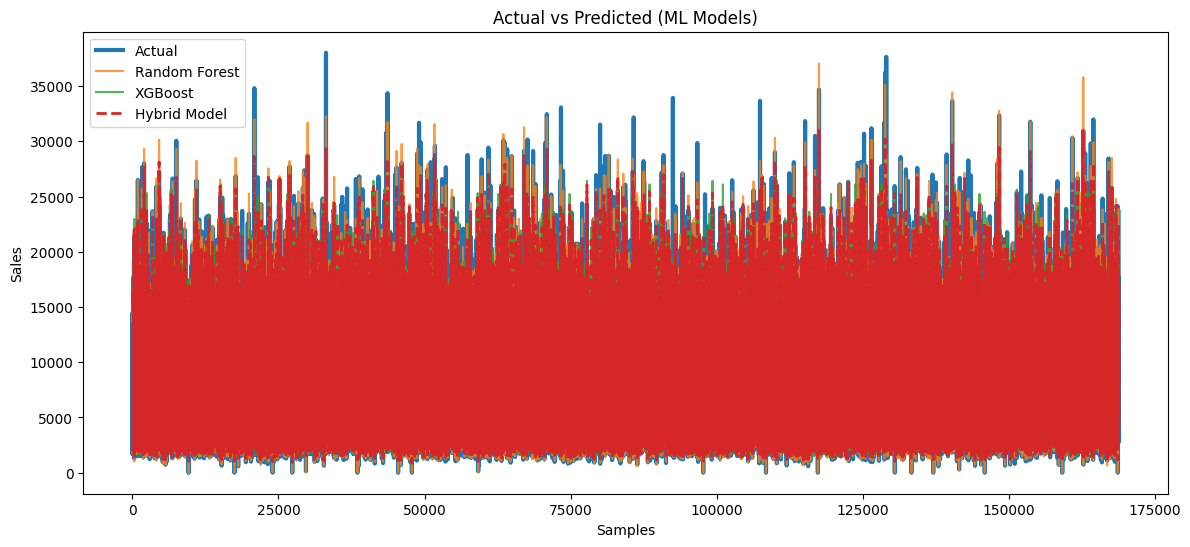

In [89]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(y_test.values, label="Actual", linewidth=3)
plt.plot(y_predict_rf, label="Random Forest", alpha=0.8)
plt.plot(y_predict_xgb, label="XGBoost", alpha=0.8)

plt.plot(0.5*y_predict_rf + 0.5*y_predict_xgb, label="Hybrid Model", linestyle="--", linewidth=2)

plt.title("Actual vs Predicted (ML Models)")
plt.xlabel("Samples")
plt.ylabel("Sales")
plt.legend()
plt.show()


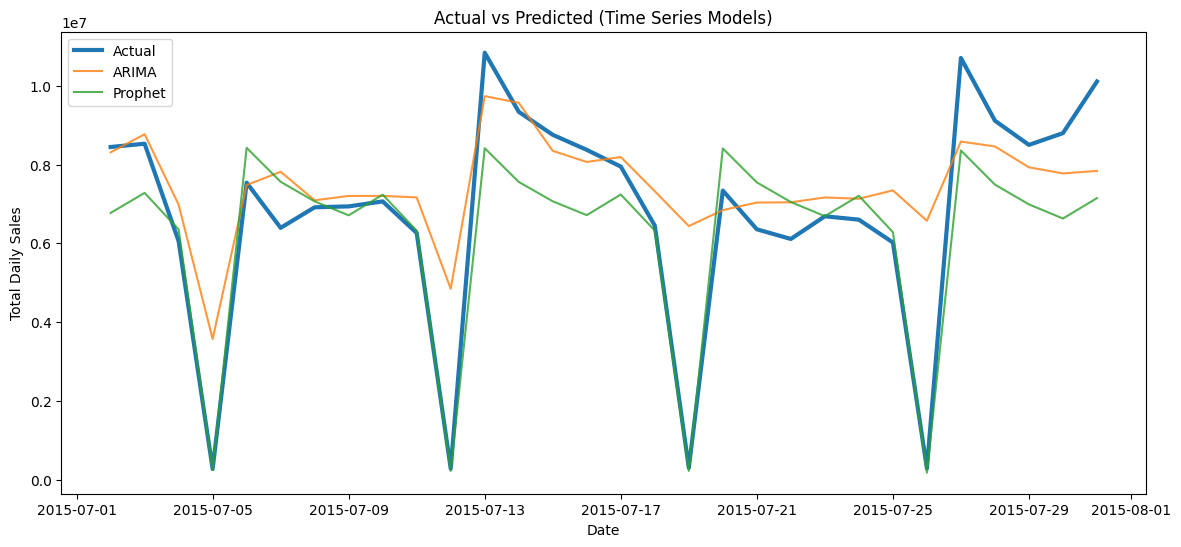

In [90]:
plt.figure(figsize=(14,6))
plt.plot(test_arima.index, test_arima.values, label="Actual", linewidth=3)
plt.plot(test_arima.index, arima_pred, label="ARIMA", alpha=0.8)
plt.plot(test_arima.index, prophet_pred, label="Prophet", alpha=0.8)

plt.title("Actual vs Predicted (Time Series Models)")
plt.xlabel("Date")
plt.ylabel("Total Daily Sales")
plt.legend()
plt.show()


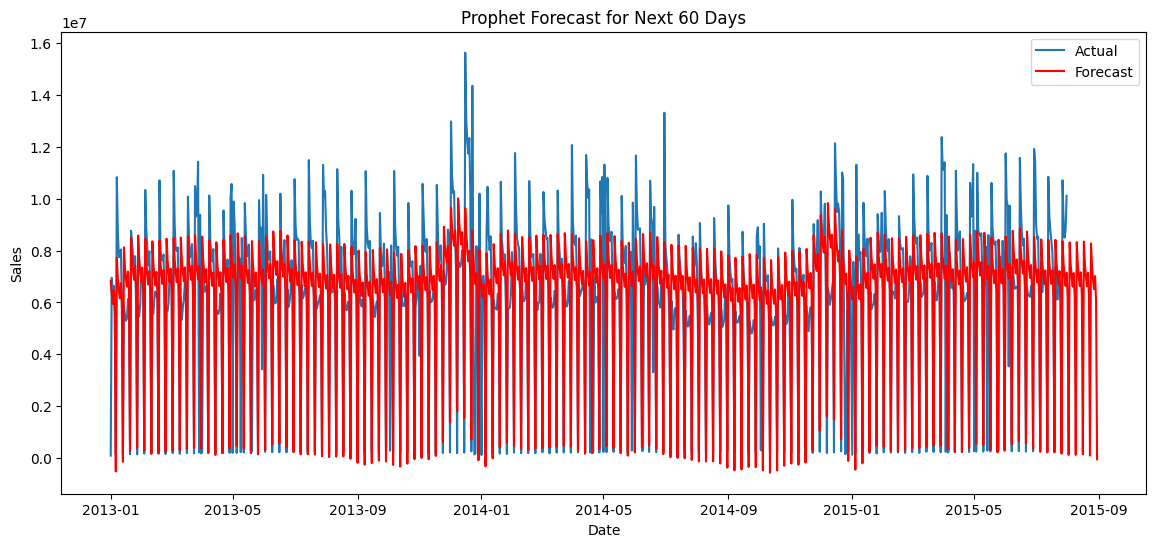

In [91]:
future = model_prophet.make_future_dataframe(periods=60)
forecast = model_prophet.predict(future)

plt.figure(figsize=(14,6))
plt.plot(prophet_df["ds"], prophet_df["y"], label="Actual")
plt.plot(forecast["ds"], forecast["yhat"], label="Forecast", color="red")

plt.title("Prophet Forecast for Next 60 Days")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()
